# Optimal solution of travelling salesman problem in Poland 

# Optymalne rozwiązanie problemu komiwojażera w Polsce

authors: Dominik Jagoda, Mateusz Sikora (Jan Kochanowski University in Kielce)

autorzy: Dominik Jagoda, Mateusz Sikora (Uniwersytet Jana Kochanowskiego w Kielcach)

sources/źródła:

https://developers.google.com/optimization/routing/tsp

http://astronomia.zagan.pl/art/wspolrzedne.html

In [1]:
import ortools
import pandas as pd
import csv
import numpy as np

In [2]:
list=[]
with open('C:/temp/data.txt','r',encoding="utf8") as file:
#with open('./temp/data.txt','r',encoding="utf8") as file:
       for char in file:
            list.append(char.strip().split())
            print(char)

City                    Length         Width

Adamów-(siedleckie)     22°15'E        51°45'N

Adamów-(zamojskie)      23°10'E        50°36'N

Adamówka                22°42'E        50°16'N

Aleksandrów             19°59'E        51°16'N

Aleksandrów-Kujawski    18°42'E        52°53'N

Aleksandrów-Łódzki      19°19'E        51°49'N

Alwernia                19°32'E        50°04'N

Andrespol               19°37'E        51°44'N

Andrychów               19°20'E        49°52'N

Andrzejewo              22°12'E        52°50'N

Annopol                 21°52'E        50°53'N

Augustów                22°58'E        53°51'N

Babiak                  18°41'E        52°20'N

Babice                  19°26'E        50°04'N

Babimost                15°50'E        52°09'N

Baborów                 17°59'E        50°09'N

Baboszewo               20°15'E        52°42'N

Baćkowice               21°14'E        50°48'N

Bakałarzewo             22°39'E        54°06'N

Baligród                22°17'E        49°

Tułowice                20°17'E        52°22'N

Tuplice                 14°49'E        51°40'N

Turawa                  18°05'E        50°44'N

Turek                   18°30'E        52°01'N

Turobin                 22°45'E        50°49'N

Turośl                  21°44'E        53°23'N

Turośń-Kościelna        23°03'E        53°01'N

Tuszów-Narodowy         21°28'E        50°22'N

Tuszyn                  19°32'E        51°36'N

Twardogóra              17°28'E        51°22'N

Tworóg                  18°43'E        50°33'N

Tychowo                 16°15'E        53°55'N

Tychy                   18°59'E        50°08'N

Tychy-Paprocany         19°00'E        50°06'N

Tyczyn                  22°02'E        49°58'N

Tykocin                 22°46'E        53°12'N

Tymbark                 20°19'E        49°44'N

Tyrawa-Wołoska          22°22'E        49°34'N

Tyszowice               23°41'E        50°37'N

Uchanie                 23°39'E        50°55'N

Udanin                  16°27'E        5

In [3]:
len(list)

2276

In [4]:
def data_save_csv(i):

    with open('C:/temp/data111.csv', 'a', encoding='utf-8') as csvfile:
   # with open('./temp/data111.csv', 'a', encoding='utf-8') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(i)
            
def conversion(old):
    direction = {'N':1, 'S':-1, 'E': 1, 'W':-1}
    #new = str(old).replace(u'°',' ').replace('\'',' ').replace('"',' ')
    new = str(old).replace(u'°',' ').replace('\'',' ').replace('"',' ')
    new = new.split()
    new_dir = new.pop()
    new.extend([0,0,0])
    return (int(new[0])+int(new[1])/60.0+int(new[2])/3600.0) * direction[new_dir]

In [5]:
for i in list:
    data_save_csv(i)

In [6]:
data=pd.read_csv('C:/temp/data111.csv')
#data=pd.read_csv('./temp/data111.csv')
data

,City,Length,Width
0,Adamów-(siedleckie),22°15'E,51°45'N
1,Adamów-(zamojskie),23°10'E,50°36'N
2,Adamówka,22°42'E,50°16'N
3,Aleksandrów,19°59'E,51°16'N
4,Aleksandrów-Kujawski,18°42'E,52°53'N
...,...,...,...
2270,Żyraków,21°25'E,50°06'N
2271,Żyrardów,20°26'E,52°03'N
2272,Żyrzyn,22°06'E,51°30'N
2273,Żytno,19°37'E,50°56'N


In [7]:
x=data['Length']
list2=[]
for i in x:
    list2.append(round(conversion(i),3))

In [8]:
y=data['Width']
list3=[]
for i in y:
    list3.append(round(conversion(i),3))

In [9]:
data.insert(3, "Length Decimal",list2, True)
data.insert(4,"Width Decimal",list3, True)

In [10]:
data

,City,Length,Width,Length Decimal,Width Decimal
0,Adamów-(siedleckie),22°15'E,51°45'N,22.250,51.750
1,Adamów-(zamojskie),23°10'E,50°36'N,23.167,50.600
2,Adamówka,22°42'E,50°16'N,22.700,50.267
3,Aleksandrów,19°59'E,51°16'N,19.983,51.267
4,Aleksandrów-Kujawski,18°42'E,52°53'N,18.700,52.883
...,...,...,...,...,...
2270,Żyraków,21°25'E,50°06'N,21.417,50.100
2271,Żyrardów,20°26'E,52°03'N,20.433,52.050
2272,Żyrzyn,22°06'E,51°30'N,22.100,51.500
2273,Żytno,19°37'E,50°56'N,19.617,50.933


In [11]:
cities=np.array(data[["Width Decimal","Length Decimal"]])
cities

array([[51.75 , 22.25 ],
       [50.6  , 23.167],
       [50.267, 22.7  ],
       ...,
       [51.5  , 22.1  ],
       [50.933, 19.617],
       [49.7  , 19.2  ]])

In [12]:
import matplotlib.pyplot as plt
import math
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [13]:
n=len(cities)

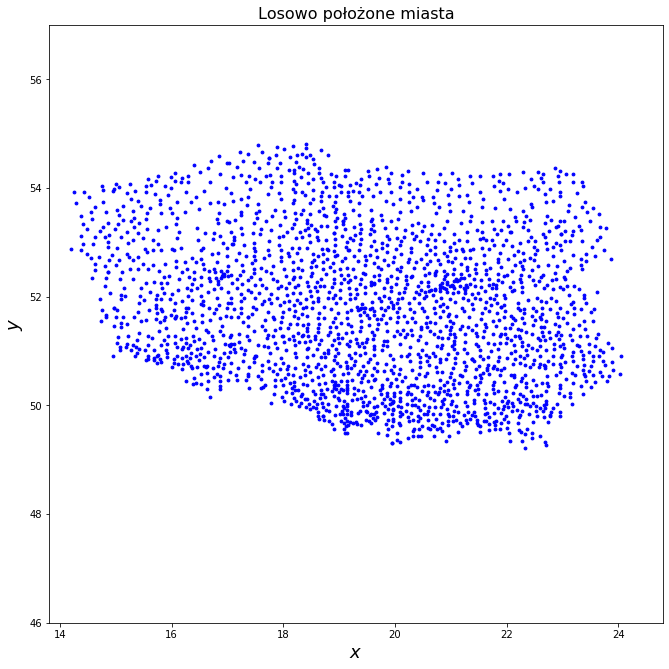

In [14]:
plt.figure(figsize=(11,11))
plt.title("Losowo położone miasta",fontsize=16) 
plt.xlim(13.8,24.8)
plt.ylim(46,57)

plt.scatter(cities[:,1],cities[:,0],c='blue', s=8)

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

In [15]:
#program służący do obliczenia odlogłości pomiędzy wszystkimi punktami
y=0
x=0 #y oraz x to numery kolumn i wierszy macierzy
k = [[0] * n for i in range(n)] #definiuje k jako tablice dwuwymiarową 
for i in range(n):
    for j in range(n):
        #Twierdzenie Pitagorasa
        odl=cities[x]-cities[y]
        y=y+1
        odl=np.fabs(odl) #oblicza wartość bezwzględną
        odl=odl*odl
        hh=odl[0]+odl[1]
        hh=math.sqrt(hh) #oblicza pierwiastek
        k[i][j] = hh*100000000 #zwiększamy rozmiar wszystkich punktów, ponieważ program dokonuje zaokrągleń, przez co wyniki są mniej dokładne
    y=0
    x=x+1

In [16]:
dd = [n for i in range(n)]

In [17]:
def create_data_model(): #odczytuje i przechowuje dane dotyczące problemu - przede wszystkim odległość pomiędzy miastami
    data = {}
    data['distance_matrix'] = k
    data['num_vehicles'] = 1 #nie działa
    data['depot'] = 0 #powrót do punktu startowego po paliwo
    return data

def print_solution(manager, routing, solution): #wyświetla rozwiązanie problemu
    print('Objective: {} miles'.format(solution.ObjectiveValue())) #długość trasy
    index = routing.Start(0) #routing.Start(0) to punkt startowy, a index to każdy z tych punktów
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0 #długość trasy na początku wynosi 0, potem będzie zwiększany, wraz z wykonywaniem pętli
    while not routing.IsEnd(index): #pętla jest wykonywana dopóki nie dojdziemy do ostatniego punktu
        for i in range(n): #pętla dodana przeze mnie, żeby stworzyć tablicę dd
            plan_output += ' {} ->'.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            dd[i]=index
            route_distance += routing.GetArcCostForVehicle(previous_index, index, 0) #zwiększanie długości trasy 
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}miles\n'.format(route_distance)

def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(manager, routing, solution)

In [18]:
main()

Objective: 26025344273 miles
Route for vehicle 0:
 0 -> 2130 -> 1648 -> 625 -> 1081 -> 1064 -> 875 -> 2048 -> 1431 -> 210 -> 2011 -> 391 -> 479 -> 10 -> 2203 -> 377 -> 1638 -> 473 -> 1527 -> 2189 -> 506 -> 1205 -> 1042 -> 245 -> 1775 -> 740 -> 1203 -> 1469 -> 1090 -> 876 -> 1986 -> 1338 -> 27 -> 1015 -> 772 -> 1923 -> 1637 -> 1251 -> 2091 -> 927 -> 1282 -> 102 -> 1314 -> 1635 -> 706 -> 1302 -> 1428 -> 123 -> 269 -> 2019 -> 1528 -> 251 -> 1387 -> 2270 -> 314 -> 157 -> 631 -> 1869 -> 1610 -> 1974 -> 1703 -> 1928 -> 936 -> 2245 -> 1523 -> 2084 -> 2132 -> 317 -> 128 -> 1860 -> 788 -> 40 -> 1280 -> 2086 -> 505 -> 1238 -> 113 -> 1072 -> 1264 -> 306 -> 1519 -> 1858 -> 1335 -> 1266 -> 1029 -> 1617 -> 1781 -> 106 -> 558 -> 17 -> 874 -> 137 -> 551 -> 1687 -> 1524 -> 601 -> 611 -> 493 -> 1934 -> 677 -> 236 -> 1485 -> 933 -> 1621 -> 1673 -> 20 -> 291 -> 2128 -> 1332 -> 1921 -> 638 -> 1735 -> 997 -> 1287 -> 667 -> 2096 -> 578 -> 679 -> 1499 -> 771 -> 2272 -> 25 -> 2007 -> 1226 -> 1612 -> 315 -> 444

In [19]:
print(dd)
dd[n-1]=0
sequence=np.array(dd)
sequence=np.insert(sequence,0,0) #dodaje zero na początku
print()
print(sequence)

[2130, 1648, 625, 1081, 1064, 875, 2048, 1431, 210, 2011, 391, 479, 10, 2203, 377, 1638, 473, 1527, 2189, 506, 1205, 1042, 245, 1775, 740, 1203, 1469, 1090, 876, 1986, 1338, 27, 1015, 772, 1923, 1637, 1251, 2091, 927, 1282, 102, 1314, 1635, 706, 1302, 1428, 123, 269, 2019, 1528, 251, 1387, 2270, 314, 157, 631, 1869, 1610, 1974, 1703, 1928, 936, 2245, 1523, 2084, 2132, 317, 128, 1860, 788, 40, 1280, 2086, 505, 1238, 113, 1072, 1264, 306, 1519, 1858, 1335, 1266, 1029, 1617, 1781, 106, 558, 17, 874, 137, 551, 1687, 1524, 601, 611, 493, 1934, 677, 236, 1485, 933, 1621, 1673, 20, 291, 2128, 1332, 1921, 638, 1735, 997, 1287, 667, 2096, 578, 679, 1499, 771, 2272, 25, 2007, 1226, 1612, 315, 444, 1658, 1952, 717, 2135, 2252, 2256, 1075, 490, 995, 1725, 1040, 804, 409, 1424, 2243, 1391, 433, 1041, 2093, 1723, 486, 666, 767, 1368, 1454, 229, 2025, 498, 1798, 610, 1757, 56, 1456, 478, 593, 519, 41, 1920, 1171, 1465, 1333, 1763, 1371, 1078, 1551, 902, 2029, 2028, 2033, 2030, 2034, 2035, 1013, 568, 

In [20]:
#program do obliczania długości trasy
x=0
dlug=0
for i in range(n):
    dlug=dlug+k[sequence[x]][sequence[x+1]]
    x=x+1
dlug=dlug/100000000
dlug=(round(dlug, 3))
print(dlug)

260.253


In [21]:
tour=np.array([cities[i] for i in sequence])
tour

array([[51.75 , 22.25 ],
       [51.767, 22.317],
       [51.7  , 22.317],
       ...,
       [51.883, 22.2  ],
       [51.8  , 22.2  ],
       [51.75 , 22.25 ]])

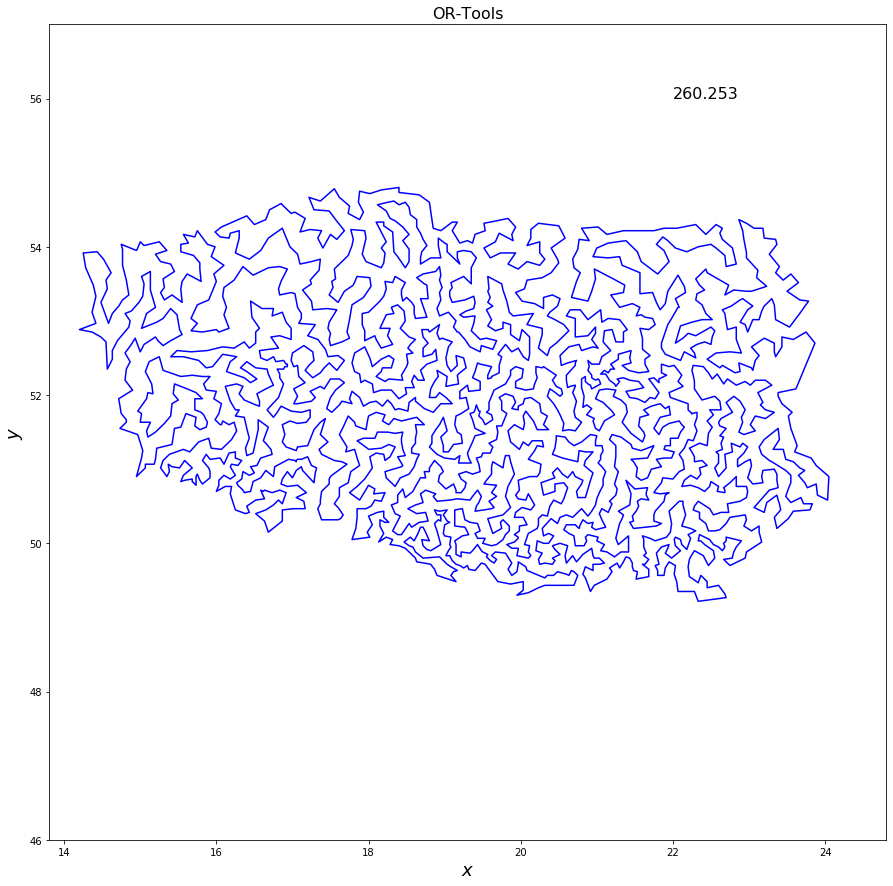

In [22]:
plt.figure(figsize=(15,15))
plt.title("OR-Tools",fontsize=16) 
plt.xlim(13.8,24.8)
plt.ylim(46,57)
#plt.scatter(cities[:,0],cities[:,1],c='red', s=10)

#plt.fill(tour[:,0],tour[:,1],c='blue')

plt.plot(tour[:,1],tour[:,0],c='blue')

plt.annotate(dlug, (22,56),fontsize=16)

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

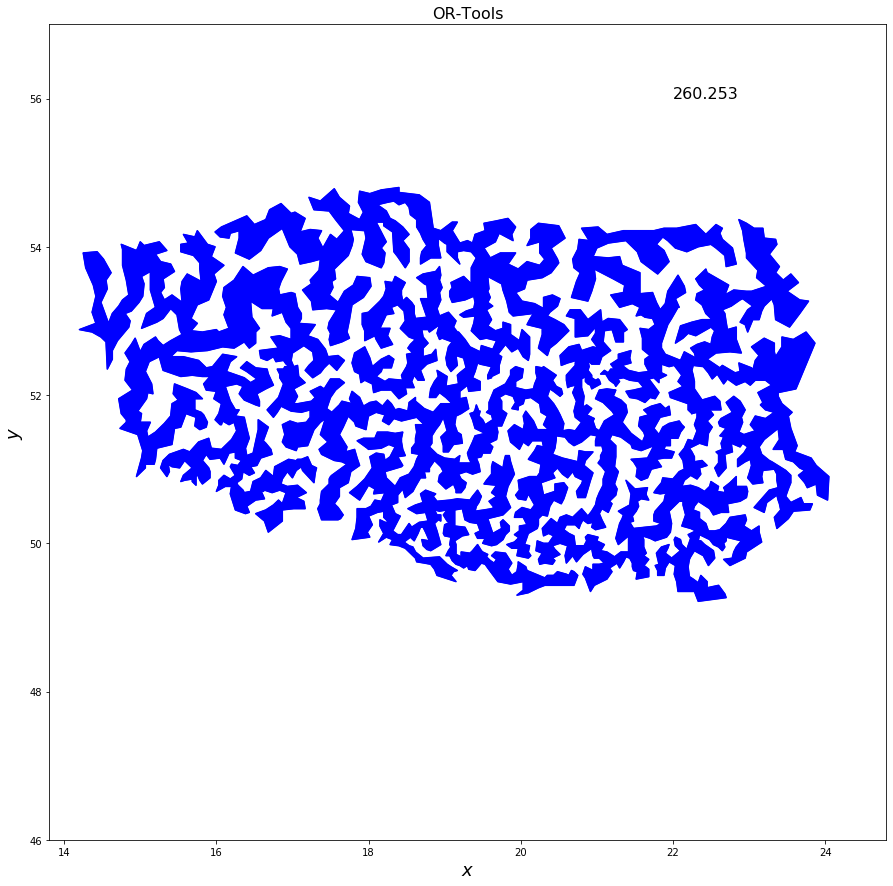

In [23]:
plt.figure(figsize=(15,15))
plt.title("OR-Tools",fontsize=16) 
plt.xlim(13.8,24.8)
plt.ylim(46,57)

#plt.scatter(cities[:,0],cities[:,1],c='red', s=20)

plt.fill(tour[:,1],tour[:,0],c='blue')

plt.plot(tour[:,1],tour[:,0],c='blue')

plt.annotate(dlug, (22,56),fontsize=16)

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

In [24]:
import folium

In [25]:
my_map = folium.Map([50.0614300,19.9365800])
for i in cities:
    folium.Marker(i).add_to(my_map)
my_map

In [26]:
my_map = folium.Map([50.0614300,19.9365800])
for i in tour:
    folium.Marker(i).add_to(my_map)
    
folium.PolyLine(tour, color="red", weight=2.5, opacity=1).add_to(my_map)
my_map

In [27]:
my_map = folium.Map([50.0614300,19.9365800])
    
folium.PolyLine(tour, color="red", weight=2.5, opacity=1).add_to(my_map)
my_map